# Part III: Interpretable Machine Learning

# Eradication of Brachyspira hyodysenteriae in swine farms
 

Brachyspira hyodysenteriae infection affects welfare and production

Its eradication (cleaning and disinfection of the barns) is voluntary in Switzerland

It involves high costs, especially for pigglet producers with continuous production. For fattening farms, it is easier thanks to slaughter, on the empty barns 

High variety of swine farms, mixed production

Project funded by Swiss Federal Office for Food Safety and Veterinary Affairs, carried out by the Swine Clinic, Animal Hospital, in collaboration with the Veterinary Public Health Institute (UniBe)

AIM: characterize the farms according to their satisfaction, who are the most dissatisfied?

For policy making: how can we make eradications easier for the farmers? how can we increase their motivation and satisfaction so that the number of eradications increase? (opinion formation)

Implication: the more eradications, the fewer infections, healthier animals and more effective production

DATA: Questionnaire-based, voluntary participation of 68 farms that performed eradications. Some strong associations exist (prelim analysis done in R)

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:/05 Consulting/Zeeh/Data"
CHAPTER_ID = "interpret"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
os.getcwd()
os.chdir("C:/05 Consulting/Zeeh/Data")
os.getcwd()

'C:\\05 Consulting\\Zeeh\\Data'

#TODO: normalize Satisfaction variable, 
rename Satisf 
rename NoDisinf = OnlyClean
recode ContRyth
recode ExtMotiv
add variables (from raw data on costs and time to perform eradication)
combine disinf (slurry,clothing,boots) variables
add SanBegE, but two categories, obliged vs convenient ?

In [3]:
import pandas as pd
#data = pd.read_csv('dataP.csv',sep=';')
data = pd.read_csv('dataP.csv',sep=';').drop(columns=['Unnamed: 0', 'PrNr.', 'Group1.1', 'Group2.1'])
data.head() # to display the first 5 lines of loaded data

#dataP created in R based on "FBAuswertungR_23.Mar.2018.csv"

,ProdType,ProdTypV,ProdTypV2rf,Motivation,Economic,Financial,Health,Medical,Content,WorkLoad,...,LabelBTS,LabelRAUS,MoreLabel,Distance,sLDistance,Outdoor,NoWild,Slurry,ExtMotiv,NoDisinf
0,1,14,2,1.0,0.0,0,0.0,0.0,1,1,...,1,1,0,800,0.526638,0,0,0,0,0
1,1,14,2,0.0,1.0,0,1.0,1.0,1,0,...,0,0,0,800,0.526638,1,1,1,0,0
2,1,14,2,1.0,1.0,0,0.0,0.0,1,0,...,1,1,0,300,-0.300913,0,0,1,0,0
3,3,12,4,0.0,0.0,1,0.0,0.0,1,1,...,1,0,0,300,-0.300913,1,1,0,1,0
4,1,14,2,1.0,1.0,1,1.0,1.0,1,0,...,1,1,0,500,0.130084,0,0,1,0,0


In [4]:
#data.info(); 
data.shape

(68, 40)

In [5]:
# displaying column names axis=1 
data.columns

Index(['ProdType', 'ProdTypV', 'ProdTypV2rf', 'Motivation', 'Economic',
       'Financial', 'Health', 'Medical', 'Content', 'WorkLoad', 'Result',
       'Again', 'Recommend', 'Group1', 'Group2', 'Satisfaction', 'SatisfBin',
       'ContRythm', 'Fatten', 'HerdSize', 'sLHerdSize', 'TotalSan', 'AddPer',
       'Bhyo', 'SowPoolS', 'NrPer', 'sLNrPers', 'Sluice', 'Clothes', 'Boots',
       'LabelBTS', 'LabelRAUS', 'MoreLabel', 'Distance', 'sLDistance',
       'Outdoor', 'NoWild', 'Slurry', 'ExtMotiv', 'NoDisinf'],
      dtype='object')

Target variables are Motivation (being motivated before) and Satisfaction (including its 9 aspects,i.e. ZufrSann, etc)

Feature variables are

-farm characteristics (herd size, prodtype, ring, quality labels, access to outdoor, contact to wild, disinf (slurry,clothing,boots) )

-variables related to the eradication (Bhyo confirmed, total san, personnel, additional personnel, external motivation, only cleaning, costs (to add))

In [6]:
#production type (1= fattening herd, 2= piglet rearing herd, 3= piglet producer, 4= Sow pool herd)
#Produktionstyp (1= Mastbestand oder Remontenaufzucht, 2= Ferkelaufzucht, 3= Abferkel- und Aufzucht, 4= Deck- Wartebestand)
pd.crosstab(data["ProdType"], data["ProdTypV2rf"])

ProdTypV2rf,1,2,3,4
ProdType,,,,
1,0,32,0,0
2,0,0,10,0
3,0,0,0,22
4,4,0,0,0


In [7]:
pd.crosstab(data["Fatten"], data["ProdType"])
#there is only 4 sow pool herds, without fattening

ProdType,1,2,3,4
Fatten,,,,
0,0,3,12,4
1,32,7,10,0


In [8]:
pd.crosstab(data["Fatten"], data["SatisfBin"])

SatisfBin,0,1
Fatten,,
0,13,6
1,21,28


In [9]:
pd.crosstab(data["NoDisinf"], data["SatisfBin"])

SatisfBin,0,1
NoDisinf,,
0,33,28
1,1,6


In [10]:
pd.crosstab(data["ProdType"], data["SatisfBin"])

SatisfBin,0,1
ProdType,,
1,11,21
2,7,3
3,13,9
4,3,1


Hypothesis: most fattening are satisfied, but not the pigglet producers (2,3) and the sow pool farms (4) - less satisfied

## Missing values

In [11]:
data.isnull().sum()
#TODO: four variables with only one missing (Motivation, WirtSann, GesuSann, MediSann)
#TODO: data imputation, calculate the highest proportion and assign the missing to the highest proportion(?)

ProdType         0
ProdTypV         0
ProdTypV2rf      0
Motivation       1
Economic         1
Financial        0
Health           1
Medical          1
Content          0
WorkLoad         0
Result           0
Again            8
Recommend        2
Group1           0
Group2           0
Satisfaction     0
SatisfBin        0
ContRythm       32
Fatten           0
HerdSize         0
sLHerdSize       0
TotalSan         0
AddPer           0
Bhyo             0
SowPoolS         0
NrPer            0
sLNrPers         0
Sluice           0
Clothes          0
Boots            0
LabelBTS         0
LabelRAUS        0
MoreLabel        0
Distance         0
sLDistance       0
Outdoor          0
NoWild           0
Slurry           0
ExtMotiv         0
NoDisinf         0
dtype: int64

In [12]:
data["ContRythm"].isnull().sum()

32

ContRyth only applies to pigglet producers, this variable needs to be excluded for some analysis

But if continuous rythm is more expensive and if only applies to pigglet producers, here the least satisfied farmers would be, or not?

In [13]:
pd.crosstab(data["ContRythm"], data["SatisfBin"])

SatisfBin,0,1
ContRythm,,
0.0,13,11
1.0,10,2


In [14]:
data["Again"].isnull().sum().sum()
#ErneSann contains 8 NAs and needs to be excluded for some analysis, alternatively, recoded

8

Variable Again: would you do it again? (the eradication); 8 farmers did not reply (which is a bad sign)

we could recode Again 'no reply' as 'no'

we could pose the additional question:  what leads to a non-reply, how can we support these farmers to be more satisfied? (similar to gaining voters)

In [15]:
data["Recommend"].isnull().sum()
#EmpfSann ("would you recommend eradications to others?") contains 2 NAs, perhaps exclude

2

## Numerical variables

only herd size and number of personnel that worked on the eradication, plus the satisfaction score

In [16]:
data["sLHerdSize"].describe()

count    6.800000e+01
mean    -5.882357e-11
std      1.000000e+00
min     -2.250458e+00
25%     -5.731210e-01
50%     -2.314010e-01
75%      5.967385e-01
max      2.910479e+00
Name: sLHerdSize, dtype: float64

In [17]:
data["sLNrPers"].describe()

count    6.800000e+01
mean    -1.323528e-10
std      1.000000e+00
min     -1.450536e+00
25%     -4.184225e-01
50%      1.853249e-01
75%      6.136906e-01
max      3.342449e+00
Name: sLNrPers, dtype: float64

In [18]:
data["Satisfaction"].describe()

count    68.000000
mean      6.191176
std       1.805938
min       2.000000
25%       5.000000
50%       6.500000
75%       7.000000
max       9.000000
Name: Satisfaction, dtype: float64

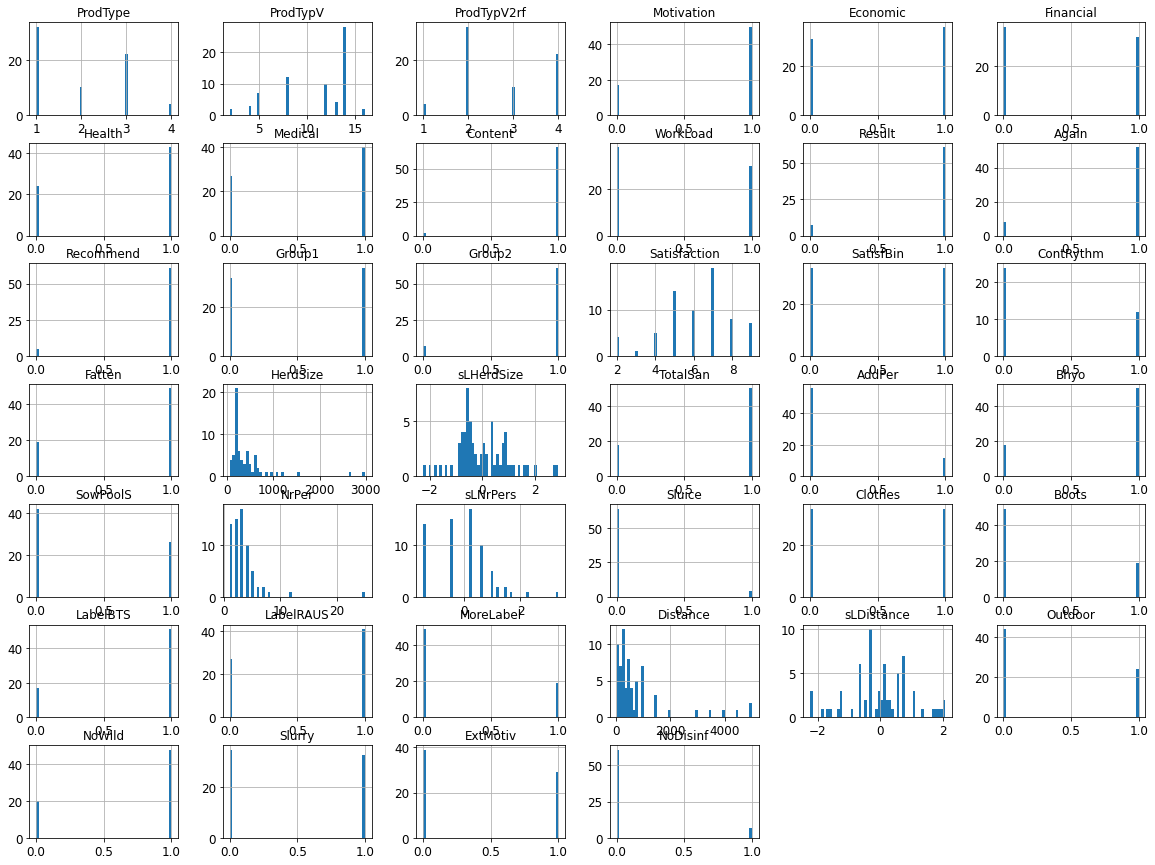

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

## Associations

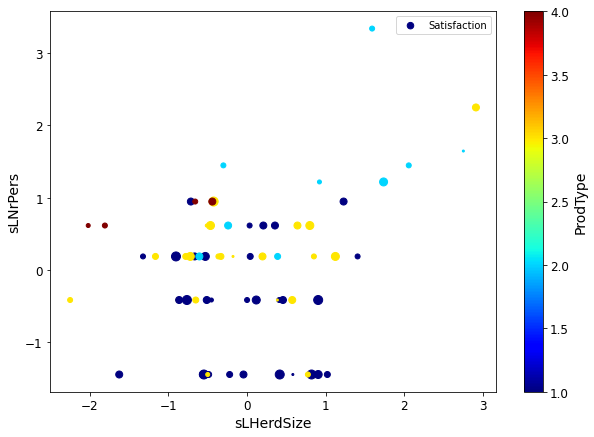

In [20]:
data.plot(kind="scatter", x="sLHerdSize", y="sLNrPers", alpha=1,
    s=data["Satisfaction"]**2, label="Satisfaction", figsize=(10,7),
    c="ProdType", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#I take the power2 of satisfaction for the size of the circles
#Prodtype 2 and 3 are the pigglet producers and piggle rearing farms, high number of animals, 
#they are no so large in terms of biomass
#save_fig("herdsize_Pers_scatterplot")

In [21]:
corr_matrix = data.corr()

In [22]:
#corr_matrix["sLHerdSize"].sort_values(ascending=False)
#TODO Spearman-rank correlation coef

In [23]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["sLHerdSize","sLNrPers"]
#scatter_matrix(data[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

Due to the association between herd size and personnel, we would have to normalize the personnel or the costs by the herd size; calculate the personnel per animal or the cost per animal

In [24]:
corr_matrix["Satisfaction"].sort_values(ascending=False)

Satisfaction    1.000000
SatisfBin       0.812158
Health          0.683614
Economic        0.602798
Recommend       0.588988
Medical         0.577396
Result          0.549052
Again           0.495858
Financial       0.425394
Motivation      0.410692
Content         0.261336
Fatten          0.249236
ProdTypV        0.246333
NoDisinf        0.233833
Slurry          0.224731
Bhyo            0.175557
WorkLoad        0.169593
TotalSan        0.119773
Group2          0.063123
NoWild          0.050836
Sluice          0.008204
Clothes         0.008204
Boots          -0.011561
sLHerdSize     -0.024830
ContRythm      -0.033113
sLDistance     -0.042466
Distance       -0.049597
Outdoor        -0.061597
MoreLabel      -0.102974
HerdSize       -0.113509
NrPer          -0.130577
sLNrPers       -0.136432
ProdTypV2rf    -0.163818
LabelRAUS      -0.164952
LabelBTS       -0.165773
SowPoolS       -0.202078
AddPer         -0.221523
ProdType       -0.280021
Group1         -0.310344
ExtMotiv       -0.340777


## Subset the data

In [25]:
#TODO drop ContRyth

In [26]:
data.columns

Index(['ProdType', 'ProdTypV', 'ProdTypV2rf', 'Motivation', 'Economic',
       'Financial', 'Health', 'Medical', 'Content', 'WorkLoad', 'Result',
       'Again', 'Recommend', 'Group1', 'Group2', 'Satisfaction', 'SatisfBin',
       'ContRythm', 'Fatten', 'HerdSize', 'sLHerdSize', 'TotalSan', 'AddPer',
       'Bhyo', 'SowPoolS', 'NrPer', 'sLNrPers', 'Sluice', 'Clothes', 'Boots',
       'LabelBTS', 'LabelRAUS', 'MoreLabel', 'Distance', 'sLDistance',
       'Outdoor', 'NoWild', 'Slurry', 'ExtMotiv', 'NoDisinf'],
      dtype='object')

In [27]:
dgr = data[['ProdType', 'Group2', 'Satisfaction', 'SatisfBin', 'Motivation', 
            'Fatten', 'ExtMotiv', 'NoDisinf', 'AddPer', 'SowPoolS', 
             'Outdoor']]
dgr.head()

,ProdType,Group2,Satisfaction,SatisfBin,Motivation,Fatten,ExtMotiv,NoDisinf,AddPer,SowPoolS,Outdoor
0,1,1,5,0,1.0,1,0,0,0,0,0
1,1,1,7,1,0.0,1,0,0,0,0,1
2,1,1,5,0,1.0,1,0,0,0,0,0
3,3,1,6,0,0.0,1,1,0,0,1,1
4,1,1,8,1,1.0,1,0,0,0,0,0


In [28]:
dgr2 = dgr.loc[lambda df: df['Group2']>0, :]
dgr2.shape


(61, 11)

In [29]:
dgr2.columns

Index(['ProdType', 'Group2', 'Satisfaction', 'SatisfBin', 'Motivation',
       'Fatten', 'ExtMotiv', 'NoDisinf', 'AddPer', 'SowPoolS', 'Outdoor'],
      dtype='object')

In [30]:
dgr2.loc[ : , "OwnMotiv"] = dgr2["ExtMotiv"]
dgr2.columns
pd.value_counts(dgr2["ExtMotiv"])

C:\Users\beatriz\.conda\envs\CAS_AML_Nov21\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0    38
1    23
Name: ExtMotiv, dtype: int64

In [31]:
#recoding not necessary anymore (done in R)
#dgr2["OwnMotiv"].replace(dict(OwnMotiv={1:0, 0:1}))
dgr2['OwnMotiv'][(dgr2['ExtMotiv'] ==1)] = 0
dgr2['OwnMotiv'][(dgr2['ExtMotiv'] ==0)] = 1

C:/Users/beatriz/AppData/Local/Temp/xpython_7336/1623425352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgr2['OwnMotiv'][(dgr2['ExtMotiv'] ==1)] = 0
C:\Users\beatriz\.conda\envs\CAS_AML_Nov21\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:/Users/beatriz/AppData/Local/Temp/xpython_7336/1623425352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
pd.crosstab(dgr2["OwnMotiv"],dgr2["ExtMotiv"])

ExtMotiv,0,1
OwnMotiv,,
0,0,23
1,38,0


In [33]:
pd.crosstab(dgr2["NoDisinf"],dgr2["SatisfBin"])

SatisfBin,0,1
NoDisinf,,
0,29,25
1,1,6


NoDisinf variable has not enough observations and should be excluded

## Odds Ratios

Odds Ratio is the ratio of two odds:

the odds that an outcome will occur given a particular exposure, compared to the odds of the outcome occurring in the absence of that exposure

-> In this study, it is the odds that high satisfaction will occur given 'being fattening', 'low cost' or 'only cleaning', compared to the odds of high satisfaction given 'being pigglet producer', 'high costs', 'having had to additionally disinfect the stalls'.

OR=1 Exposure does not affect odds of outcome

OR>1 Exposure associated with higher odds of outcome

OR<1 Exposure associated with lower odds of outcome

OR = (a/c) / (b/d)

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2938757/

In [34]:
pd.crosstab(dgr2["OwnMotiv"],dgr2["SatisfBin"])
# outcome variable Satisf should always appear in the columns

SatisfBin,0,1
OwnMotiv,,
0,17,6
1,13,25


In [36]:
import scipy.stats
ct=pd.crosstab(dgr2["OwnMotiv"],dgr2["SatisfBin"])
oddsratio, pvalue = scipy.stats.fisher_exact(ct)
#TODO try Mantel Hanszel test
print(oddsratio, pvalue)

5.448717948717949 0.003685631358739941


### Note 1: We obtain an OR of 5.5: "farmers who performed sanitations based on their own motivation were 5.5 more likely to be satisfied than those who had to do it due to external pressure (for example, clients would not buy their pigs)"

It is imporant to code with 1 the outcome and the exposure of interest. The category 0 is the baseline or reference category.

Other good candidates for satisfaction: Fatten and NoDisinf (although this last one does not have enough observations)

In [37]:
import scipy
ct=pd.crosstab(dgr2["Fatten"],dgr2["SatisfBin"])
oddsratio, pvalue = scipy.stats.fisher_exact(ct)
#TODO try Mantel Hanszel test
print(oddsratio, pvalue)

4.0 0.058572065722833896


In [38]:
ct=pd.crosstab(dgr2["NoDisinf"],dgr2["SatisfBin"])
oddsratio, pvalue = scipy.stats.fisher_exact(ct)
#TODO try Mantel Hanszel test
print(oddsratio, pvalue)

6.96 0.10351559643760705


## Odds Ratio using sklearn

In [39]:
from sklearn.linear_model import LogisticRegression
#df=pd.get_dummies(dgr2,drop_first=True)

#penalty = 'none' is important, default is l2
clf = LogisticRegression(penalty='none')
#clf.fit(df['OwnMotiv'],df['Satisf'])
clf.fit(dgr2[["OwnMotiv"]],dgr2[["SatisfBin"]])


C:\Users\beatriz\.conda\envs\CAS_AML_Nov21\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(penalty='none')

### Note2: the default penality 'l2' in sklearn logistic regression model distorts the value of the coefficients (regularization) so we need to set penalty = 'none'

In [40]:
#exponentiate the regression coefficient from the logistic regression model
odds_ratio=np.exp(clf.coef_)
print(odds_ratio)

[[5.44870805]]


In [41]:
#Check using random_state=0 as in the CAS_AML noteboook
clf = LogisticRegression(random_state=0)
clf.fit(dgr2[["OwnMotiv"]],dgr2[["SatisfBin"]])
odds_ratio=np.exp(clf.coef_)
print(odds_ratio)

C:\Users\beatriz\.conda\envs\CAS_AML_Nov21\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[3.58904818]]


### Note3: by not specifying penalty = 'none', we get a biased 'penalized' estimate of the Odds Ratio

the default penality is 'l2' in sklearn logistic regression model

This in Statistics would be called an error type II (missing the effect when there is one)

In [42]:
#If we add the penalty = 'none', then we get the correct OR
clf = LogisticRegression(random_state=0, penalty = 'none')
clf.fit(dgr2[["OwnMotiv"]],dgr2[["SatisfBin"]])
odds_ratio=np.exp(clf.coef_)
print(odds_ratio)

C:\Users\beatriz\.conda\envs\CAS_AML_Nov21\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[5.44870805]]


In [43]:
dgr2.columns; dgr2.shape

(61, 12)

In [44]:
#print the full list of ORs
from sklearn.model_selection import train_test_split
X = dgr2.iloc[:,8:15]
y = dgr2['SatisfBin']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.05)
#minimal test_size

In [45]:
clf = LogisticRegression(random_state=0,penalty = 'none').fit(x_train, y_train)
cols = list(dgr2.columns[8:15])
cols.append('Intercept')
cofs = clf.coef_
cofs = np.append(cofs,clf.intercept_)
cofs
idata = np.transpose([cols,cofs])
idf = pd.DataFrame(idata,columns=['Feature','Weights'])
idf = idf.sort_values("Weights", ascending=True)
idf['Weights'] = idf['Weights'].astype('float').round(2)
idf['Odds Ratio'] = np.exp(idf['Weights']).round(2)
idf
#clf.coef_, clf.intercept_

,Feature,Weights,Odds Ratio
2,Outdoor,-0.30,0.74
4,Intercept,-1.14,0.32
0,AddPer,-1.20,0.30
1,SowPoolS,0.79,2.20
3,OwnMotiv,1.90,6.69


In [46]:
import statsmodels.api as sm
x_train['Intercept']=1
logit_mod = sm.Logit(y_train, x_train)
logit_res = logit_mod.fit()
logit_res.summary()

C:/Users/beatriz/AppData/Local/Temp/xpython_7336/3640578484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Intercept']=1


Optimization terminated successfully.
         Current function value: 0.605740
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              SatisfBin   No. Observations:                   57
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            4
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1259
Time:                        09:55:16   Log-Likelihood:                -34.527
converged:                       True   LL-Null:                       -39.501
Covariance Type:            nonrobust   LLR p-value:                   0.04133
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AddPer        -1.2034      0.803     -1.499      0.134      -2.777       0.370
SowPoolS       0.7906      0.827      0.956      0.339      -0.830       2.411
Outdoor       -0.3007      0.666     -0.451      0.652      -1.607       1.005
OwnMotiv       1.8975      0.763      2.488      0.013       0.403       3.392
Intercept     -1.1378      0.743     -1.530      0.126      -2.595       0.319
==============================================================================
"""

In [47]:
logit_res.params.shape

(5,)

In [48]:
coeffs = logit_res.params

In [49]:
OddsRatios = np.exp(coeffs)
dfOR = pd.DataFrame(OddsRatios,columns=['OddRatio'])
dfOR = dfOR.sort_values("OddRatio", ascending=True)
dfOR

,OddRatio
AddPer,0.300165
Intercept,0.320518
Outdoor,0.740277
SowPoolS,2.204753
OwnMotiv,6.669319


## Other interpretable models and feature importance


https://christophm.github.io/interpretable-ml-book/index.html

https://scikit-learn.org/stable/modules/partial_dependence.html

https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py

https://christophm.github.io/interpretable-ml-book/counterfactual.html#counterfactual

#### For near future: explore RuleFit for categorical (binary data)

https://christophm.github.io/interpretable-ml-book/rulefit.html
Software available at:
https://github.com/christophM/rulefit

### Other Rules alternatives:
https://github.com/scikit-learn-contrib/skope-rules

https://github.com/csinva/imodels
The imodels package also contains implementations of other rule sets, such as Bayesian rule sets, Boosted rule sets, and SLIPPER rule sets as a Python package with a unified scikit-learn interface.

In [50]:
#TODO decission trees - additional way to have interpretability